In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('dark_background')

In [3]:
iris= pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.size

900

In [8]:
iris.shape

(150, 6)

In [9]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
iris['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [12]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Text(0, 0.5, 'count')

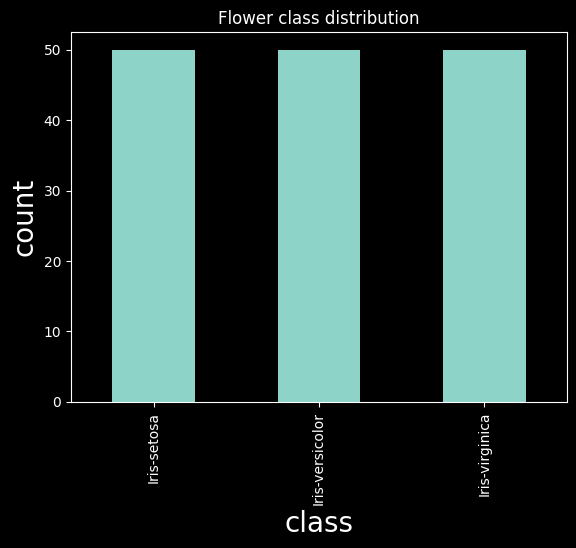

In [13]:
nameplot = iris['Species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

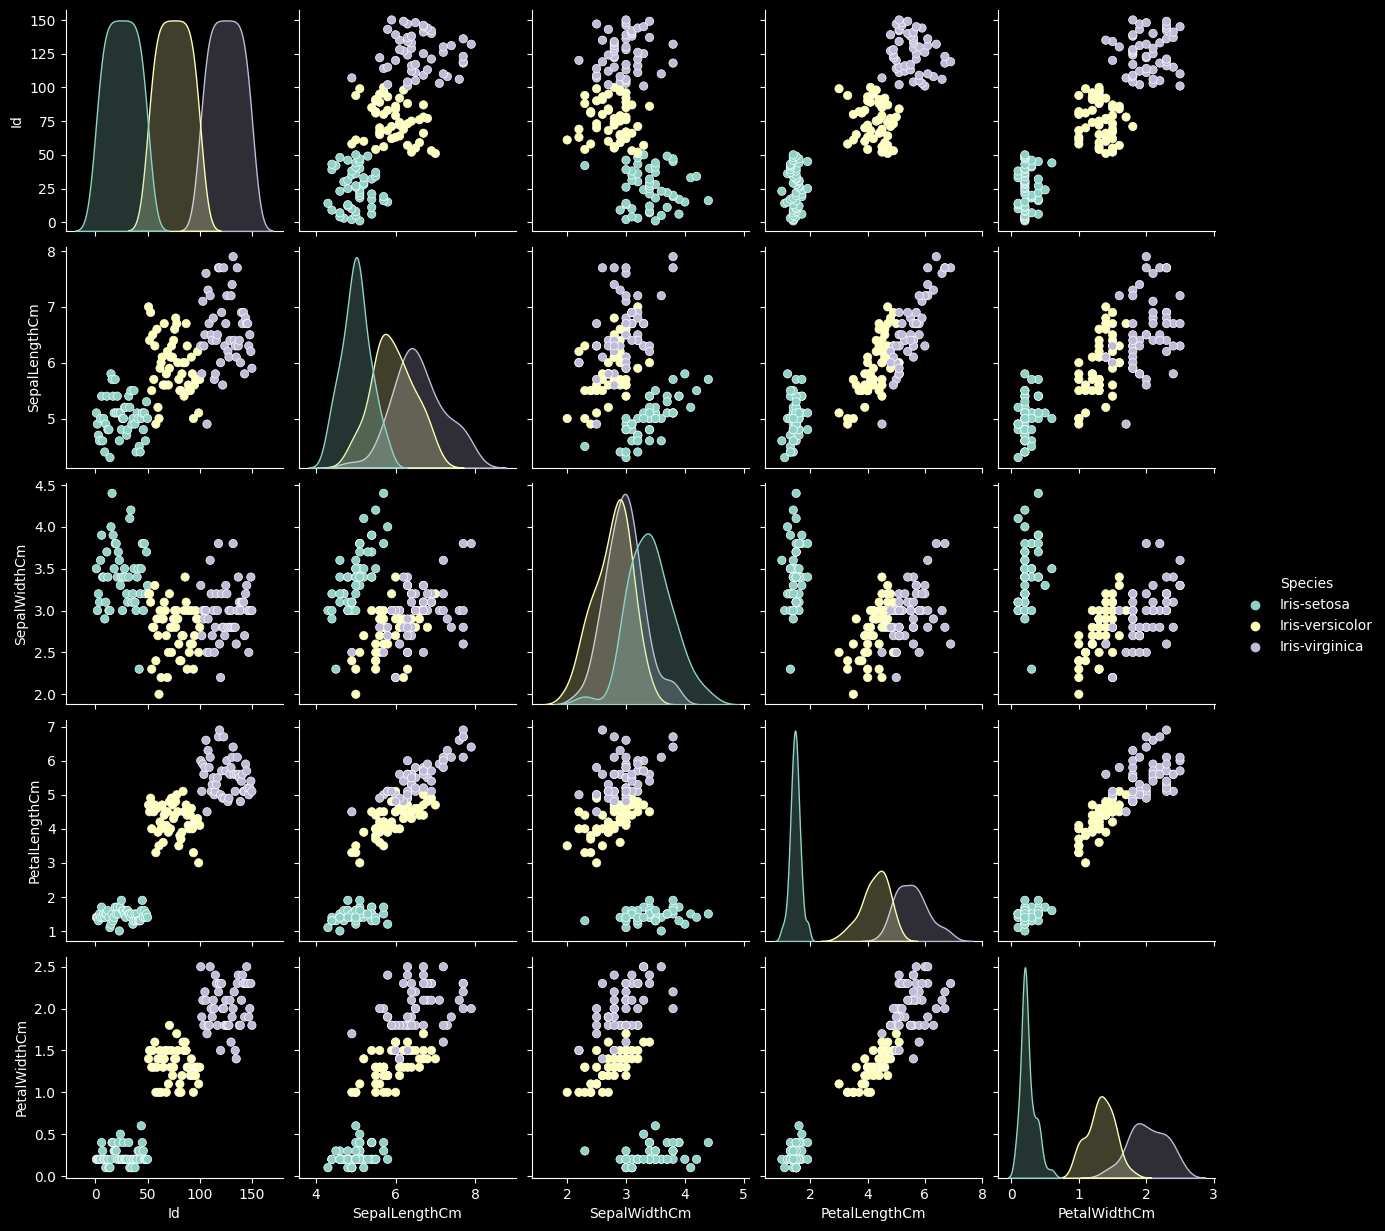

In [14]:
sns.pairplot(iris, hue='Species')

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

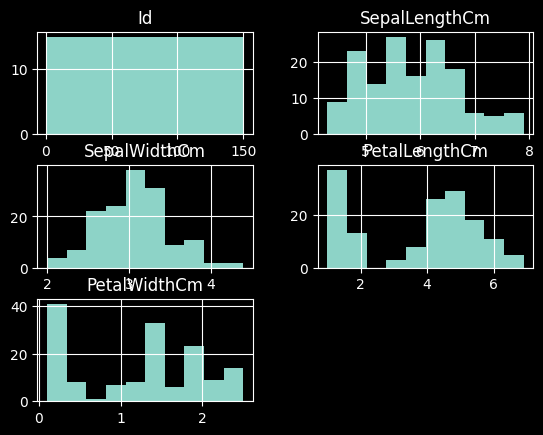

In [15]:
iris.hist()

In [16]:
x= iris.drop("Species", axis=1)
y= iris["Species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=0)
print("X_train.shape:", x_train.shape)
print("X_test.shape:", x_test.shape)
print("Y_train.shape:", y_train.shape)
print("Y_test.shape:", y_test.shape)

X_train.shape: (120, 5)
X_test.shape: (30, 5)
Y_train.shape: (120,)
Y_test.shape: (30,)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
x_new= np.array([[151, 5, 2.9, 1, 0.2]])
prediction= knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
model= KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_train, y_train)

1.0

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [21]:
def test_model(model):
    model.fit(x_train, y_train) # train the whole training set
    predictions = model.predict(x_test) # predict on test set

    # output model testing results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [22]:
test_model(model)

Accuracy: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

